YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


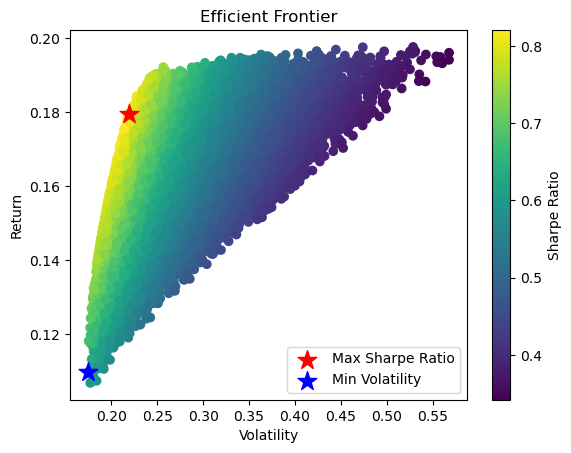

최대 샤프지수 포트폴리오
Return          0.179444
Volatility      0.218737
Sharpe Ratio    0.820365
TSLA            0.251197
AAPL            0.729176
JPM             0.001956
VOO             0.017671
Name: 9723, dtype: float64

최소 변동성 포트폴리오
Return          0.109727
Volatility      0.174937
Sharpe Ratio    0.627239
TSLA            0.007426
AAPL            0.090648
JPM             0.006396
VOO             0.895529
Name: 16518, dtype: float64


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 주식 데이터를 다운로드
tickers = ['TSLA', 'AAPL', 'JPM', 'VOO']
data = yf.download(tickers, start="2022-01-01", end="2024-12-31")['Close']

# 일일 수익률 계산
returns = data.pct_change().dropna()

# 시뮬레이션 횟수
num_simulations = 50000
num_assets = len(tickers)

# 결과를 저장할 배열 초기화
results = np.zeros((3 + num_assets, num_simulations))

# 몬테카를로 시뮬레이션 실행
for i in range(num_simulations):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # 포트폴리오 수익률과 변동성 계산
    portfolio_return = np.sum(returns.mean() * weights * 252)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_std_dev
    
    # 결과 저장
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio
    for j in range(len(weights)):
        results[3 + j, i] = weights[j]

# 결과 배열을 데이터프레임으로 변환
results_frame = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'] + tickers)

# 샤프지수가 최대인 포트폴리오와 변동성이 최소인 포트폴리오 찾기
max_sharpe_port = results_frame.loc[results_frame['Sharpe Ratio'].idxmax()]
min_vol_port = results_frame.loc[results_frame['Volatility'].idxmin()]

# 효율적 경계 플롯
plt.scatter(results_frame['Volatility'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port['Volatility'], max_sharpe_port['Return'], color='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(min_vol_port['Volatility'], min_vol_port['Return'], color='blue', marker='*', s=200, label='Min Volatility')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.show()

# 결과 출력
print("최대 샤프지수 포트폴리오")
print(max_sharpe_port)
print("\n최소 변동성 포트폴리오")
print(min_vol_port)

[*********************100%***********************]  1 of 1 completed


Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2023-12-25   43613.140625   43765.093750   42765.769531   43010.574219   
2023-12-26   42520.402344   43603.175781   41676.488281   43599.847656   
2023-12-27   43442.855469   43683.160156   42167.582031   42518.468750   
2023-12-28   42627.855469   43804.781250   42318.550781   43468.199219   
2023-12-29   42099.402344   43124.324219   41424.062500   42614.644531   
...                   ...            ...            ...            ...   
2025-06-20  103309.601562  106539.382812  102372.210938  104681.031250   
2025-06-21  102257.406250  104015.781250  100973.062500  103315.078125   
2025-06-22  100987.140625  103351.632812   98286.203125  102212.031250   
2025-06-23  105577.773438  106116.859375   99705.750000  100987.476562   
2025-06-24  106045.632812  106316.8281

C:\Users\neul\AppData\Local\Temp\ipykernel_25300\1307999988.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = price_list
C:\Users\neul\AppData\Local\Temp\ipykernel_25300\1307999988.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = price_list
C:\Users\neul\AppData\Local\Temp\ipykernel_25300\1307999988.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axi

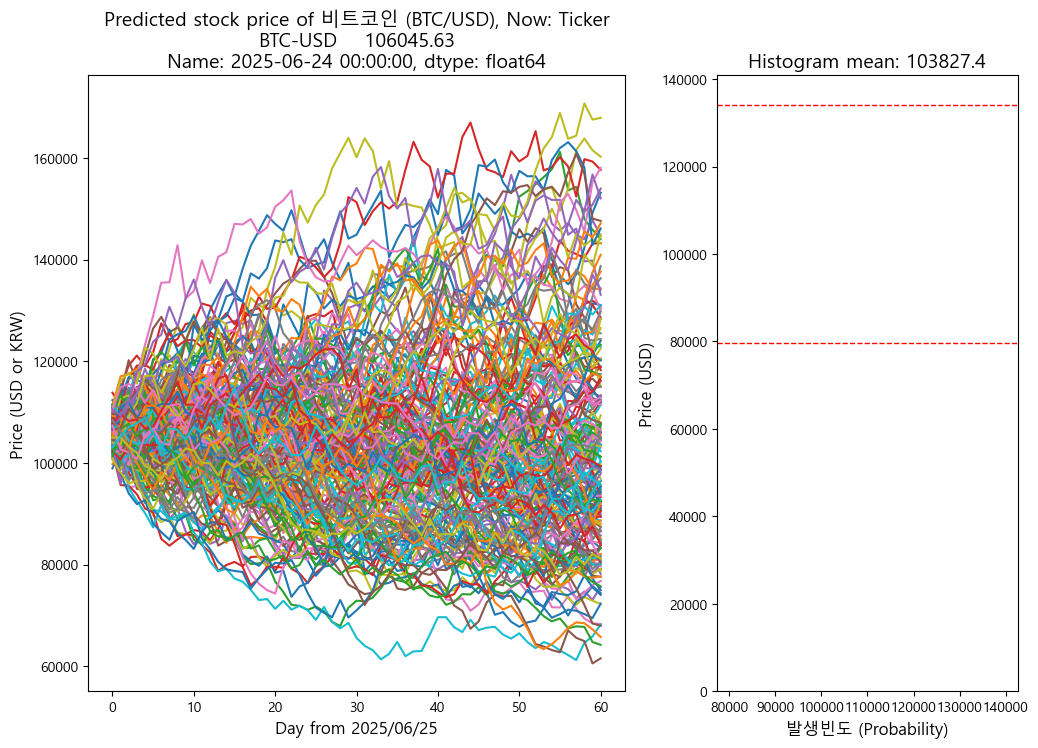

In [19]:
# Monte Carlo simulation의 random walk 모사를 통한 주가 예측 참고 홈피
# Simulating Random Walk of Stock Prices with Monte Carlo Simulation in Python
# https://medium.com/the-handbook-of-coding-in-finance/simulating-random-walk-of-stock-prices-with-monte-carlo-simulation-in-python-6e233d841e


import yfinance as yf
import pandas as pd
# import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta

import numpy as np

# 그래프 그리기, 한글 폰트 모듈
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

def main():
    # 한글 폰트 로딩
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

    today = date.today()
    
    # start = dt.datetime(2011, 1, 1)
    startD = today - relativedelta(months=18)
    endD = today

##    stock_ticker = 'AAPL'
##    stock_name = '애플 (Apple)'    
##    stock_data = yf.download(stock_ticker, startD, endD)
##    print(stock_data)

##    stock_ticker = 'TSLA'
##    stock_name = '테슬라 (Tesla)'    
##    stock_data = yf.download(stock_ticker, startD, endD)
##    print(stock_data)

##    stock_ticker = '005930.KS'
##    stock_name = '삼성전자 (Samsung)'    
##    stock_data = yf.download(stock_ticker, startD, endD)
##    print(stock_data)

    stock_ticker = 'BTC-USD'
    stock_name = '비트코인 (BTC/USD)'    
    stock_data = yf.download(stock_ticker, startD, endD)
    print(stock_data)

    returns = stock_data['Close'].pct_change()
    daily_vol = returns.std()

    NUM_SIMULATIONS =  200
    df = pd.DataFrame()
    last_price = stock_data['Close'].iloc[-1]
    last_price_list = []
    for x in range(NUM_SIMULATIONS):
        # T = 252 # for 1 year
        T = 60 # for 3 months
        count = 0
        price_list = []
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)
        
        for y in range(T):
            if count == 251:
                break
            price = price_list[count]* (1 + np.random.normal(0, daily_vol))
            price_list.append(price)
            count += 1
            
        df[x] = price_list
        last_price_list.append(price_list[-1])

    # 그래프 그리기
    plt.figure(figsize=(12,8))
    
    figL = plt.subplot2grid((1,12), (0,0), rowspan=1, colspan=7)
    figR = plt.subplot2grid((1,12), (0,8), rowspan=1, colspan=4)
            
    # fig.suptitle("Monte Carlo Simulation: " + stock_name)
    figL.plot(df)
    figL.set_title('Predicted stock price of '+stock_name+', Now: ' \
                    +str(round(last_price,2)), fontsize=14)
    figL.set_xlabel('Day from '+today.strftime('%Y-%m-%d').replace('-','/'), fontsize=12)
    figL.set_ylabel('Price (USD or KRW)', fontsize=12)
    

    # figR.hist(last_price_list, bins=40)
    # figR.axhline(np.percentile(last_price_list,10), color='r', linestyle='dashed', linewidth=1)
    # figR.axhline(np.percentile(last_price_list,90), color='r', linestyle='dashed', linewidth=1)

    # 평균값, 하위 10%, 상위 10%값 표시
    str_mean = str(round(np.mean(last_price_list), 2))
##    figR.text(10, max(last_price_list), str_mean, \
##                 fontsize=10, color='b')    
    # figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    # figR.set_xlabel('발생빈도 (Probability)', fontsize=12)
    # figR.set_ylabel('Price (USD)', fontsize=12)

    # 히스토그램 subplot (세로 방향)
    figR.hist(last_price_list, bins=20, range=(80000, 140000))

    # 분위수 라인 추가
    figR.axhline(np.percentile(last_price_list, 10), color='r', linestyle='dashed', linewidth=1)
    figR.axhline(np.percentile(last_price_list, 90), color='r', linestyle='dashed', linewidth=1)

    # 평균 텍스트 타이틀로 표시
    str_mean = str(round(np.mean(last_price_list), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)

    # 축 레이블
    figR.set_xlabel('발생빈도 (Probability)', fontsize=12)
    figR.set_ylabel('Price (USD)', fontsize=12)

    plt.show()
    
main()

